/Users/atularavinddas/Documents/GitHub/US_Income_Maps/US_Income_Maps/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


   FIPS           NAME      ACRES    SHAPE_AREA     SHAPE_LEN  \
0    33  NEW HAMPSHIRE  5935592.8  2.401324e+10  9.028755e+05   
1     0        VERMONT  6138697.6  2.486846e+10  8.630178e+05   
2    25  MASSACHUSETTS  5104241.5  2.063503e+10  1.442175e+06   
3     9    CONNECTICUT  3162420.2  1.279752e+10  6.018469e+05   
4    44   RHODE ISLAND   612942.3  2.477726e+09  3.326268e+05   

                                            geometry  
0  POLYGON ((232399.5 1228114.13, 239250.39 11147...  
1  POLYGON ((199624.3 1195967.25, 197732.75 11944...  
2  POLYGON ((56066.19 945422.5, 75567.55 944418.5...  
3  POLYGON ((35747.43 868247.5, 72026.89 866261.0...  
4  POLYGON ((222557.08 828638.5, 221663.02 827490...  


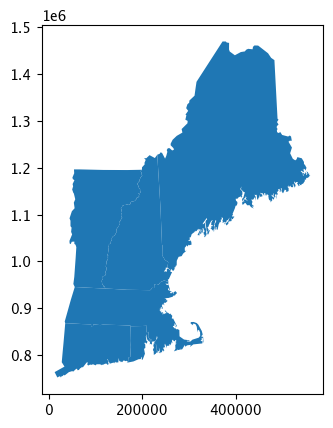

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import warnings
warnings.filterwarnings('ignore')
new_england = gpd.read_file('shapefiles/NEWENGLAND_POLY.shp')
print(new_england.head())

new_england.plot()
plt.show()



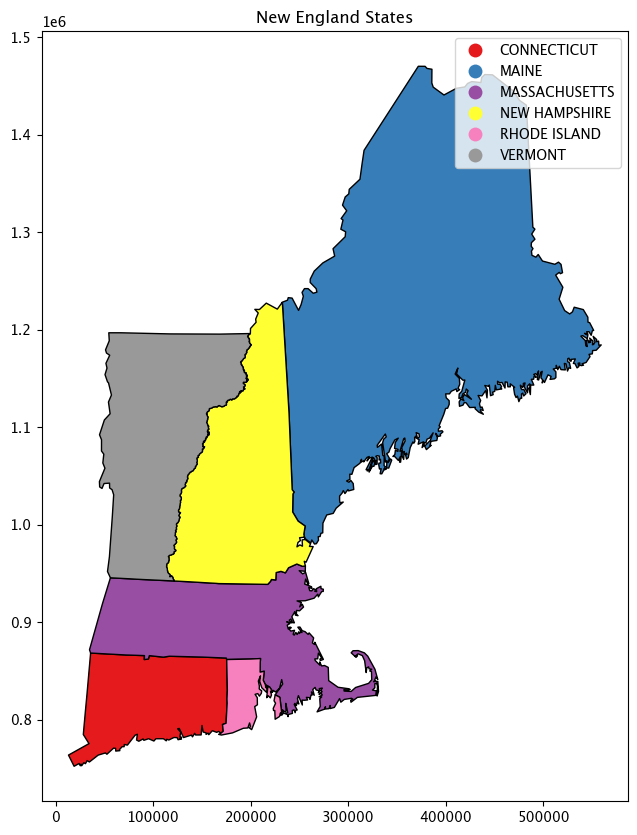

In [2]:
new_england = new_england.dissolve(by='NAME', aggfunc='first').reset_index()
fig,ax=plt.subplots(figsize=(12, 10))

new_england.plot(ax=ax,column='NAME',cmap='Set1',edgecolor='black',legend=True)
plt.title('New England States')
plt.show()

In [3]:
new_england['NAME'].unique()

array(['CONNECTICUT', 'MAINE', 'MASSACHUSETTS', 'NEW HAMPSHIRE',
       'RHODE ISLAND', 'VERMONT'], dtype=object)

In [4]:
new_england.head()

,NAME,geometry,FIPS,ACRES,SHAPE_AREA,SHAPE_LEN
0,CONNECTICUT,"POLYGON ((35747.43 868247.5, 72026.89 866261.0...",9,3162420.2,1.279752e+10,6.018469e+05
1,MAINE,"POLYGON ((354554.28 1073157.38, 354452.69 1072...",23,20639492.0,8.344433e+10,2.558386e+06
2,MASSACHUSETTS,"POLYGON ((56066.19 945422.5, 75567.55 944418.5...",25,5104241.5,2.063503e+10,1.442175e+06
3,NEW HAMPSHIRE,"POLYGON ((232399.5 1228114.13, 239250.39 11147...",33,5935592.8,2.401324e+10,9.028755e+05
4,RHODE ISLAND,"MULTIPOLYGON (((229885.98 822842.69, 231972.39...",44,612942.3,2.477726e+09,3.326268e+05


In [5]:
print(f"Total rows: {len(new_england)}")

Total rows: 6


In [6]:
new_england

,NAME,geometry,FIPS,ACRES,SHAPE_AREA,SHAPE_LEN
0,CONNECTICUT,"POLYGON ((35747.43 868247.5, 72026.89 866261.0...",9,3162420.2,1.279752e+10,6.018469e+05
1,MAINE,"POLYGON ((354554.28 1073157.38, 354452.69 1072...",23,20639492.0,8.344433e+10,2.558386e+06
2,MASSACHUSETTS,"POLYGON ((56066.19 945422.5, 75567.55 944418.5...",25,5104241.5,2.063503e+10,1.442175e+06
3,NEW HAMPSHIRE,"POLYGON ((232399.5 1228114.13, 239250.39 11147...",33,5935592.8,2.401324e+10,9.028755e+05
4,RHODE ISLAND,"MULTIPOLYGON (((229885.98 822842.69, 231972.39...",44,612942.3,2.477726e+09,3.326268e+05
5,VERMONT,"POLYGON ((199624.3 1195967.25, 197732.75 11944...",0,6138697.6,2.486846e+10,8.630178e+05


## Creating the state maps based on state details

In [8]:
import pandas as pd

parameters_df=pd.read_csv("NEW ENGLAND's data (states) - NEW ENGLAND.csv")
parameters_df

,STATES,Population,Income (per capita),Education \r\n(high school or higher attendance rate),Health (life expectancy),Crime rate (per population)
0,CONNECTICUT,"3,617,176","$53,119",91.80%,80.1,0.01590
1,MAINE,"1,395,722","$42,936",94.90%,77.2,0.00283
2,MASSACHUSETTS,"7,001,399","$55,897",91.40%,79.7,0.02540
3,NEW HAMPSHIRE,"1,402,054","$51,587",94.40%,79.6,0.00412
4,RHODE ISLAND,"1,095,962","$46,525",89.60%,78.9,0.00469
5,VERMONT,"647,464","$46,029",95.50%,79.7,0.00211


In [14]:
parameters_df.columns.tolist()

['STATES',
 'Population',
 'Income (per capita)',
 'Education \r\n(high school or higher attendance rate)',
 'Health (life expectancy)',
 'Crime rate (per population)']

In [17]:
new_england['Population'] = parameters_df['Population'].str.replace(',', '').astype(float)
new_england['Income'] = parameters_df['Income (per capita)'].str.replace('$', '').str.replace(',', '').astype(float)
new_england['Education']=parameters_df['Education \r\n(high school or higher attendance rate)']
new_england['Health']=parameters_df['Health (life expectancy)']
new_england['Crime Rare']=parameters_df['Crime rate (per population)']
new_england

,NAME,geometry,FIPS,ACRES,SHAPE_AREA,SHAPE_LEN,Income,Education,Healthcare,Crime,Population,Health,Crime Rare
0,CONNECTICUT,"POLYGON ((-73.48423 42.04743, -73.04563 42.036...",9,3162420.2,1.279752e+10,6.018469e+05,53119.0,91.80%,7.5,300,3617176.0,80.1,0.01590
1,MAINE,"POLYGON ((-69.5771 43.89326, -69.57868 43.8831...",23,20639492.0,8.344433e+10,2.558386e+06,42936.0,94.90%,8.2,250,1395722.0,77.2,0.00283
2,MASSACHUSETTS,"POLYGON ((-73.25806 42.74605, -73.0197 42.7403...",25,5104241.5,2.063503e+10,1.442175e+06,55897.0,91.40%,7.8,280,7001399.0,79.7,0.02540
3,NEW HAMPSHIRE,"POLYGON ((-71.08751 45.30145, -71.0086 44.2821...",33,5935592.8,2.401324e+10,9.028755e+05,51587.0,94.40%,8.5,200,1402054.0,79.6,0.00412
4,RHODE ISLAND,"MULTIPOLYGON (((-71.11713 41.49306, -71.13138 ...",44,612942.3,2.477726e+09,3.326268e+05,46525.0,89.60%,7.0,350,1095962.0,78.9,0.00469
5,VERMONT,"POLYGON ((-71.50476 45.01328, -71.52872 44.999...",0,6138697.6,2.486846e+10,8.630178e+05,46029.0,95.50%,8.0,220,647464.0,79.7,0.00211


In [ ]:
new_england = new_england.dissolve(by='NAME', aggfunc='first').reset_index()


new_england['']
new_england['Education'] = [85, 90, 80, 92, 78, 88]
new_england['Healthcare'] = [7.5, 8.2, 7.8, 8.5, 7.0, 8.0]
new_england['Crime'] = [300, 250, 280, 200, 350, 220]


new_england = new_england.to_crs(epsg=4326)

m = folium.Map(location=[44, -71], zoom_start=6)

folium.Choropleth(
    geo_data=new_england,
    name='Income',
    data=new_england,
    columns=['NAME', 'Income'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Median Income ($)'
).add_to(m)

folium.GeoJson(
    new_england,
    name='State Details',
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'Income', 'Education', 'Healthcare', 'Crime'],
        aliases=['State:', 'Income ($):', 'Education:', 'Healthcare:', 'Crime:'],
        style='background-color: white; color: black; font-weight: bold;'
    )
).add_to(m)

folium.LayerControl().add_to(m)


m.save('new_england_map.html')
